In [1]:
import numpy as np

import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)
from datetime import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller
# from statsmodels.tsa.statespace.sarimax import SARIMAX

# print(np.__version__)
# print(pd.__version__)
# print(statsmodels.__version__)
# print(sns.__version__)

# EDA

In [3]:
df = pd.read_csv('../data/raw/dataset_with_raw_data.csv', parse_dates=True, index_col=0)

In [4]:
df.describe()

lme_price     lme_volume   lme_change  alcoa_price  alcoa_volume  \
count  1471.00000    1453.000000  1471.000000  1464.000000  1.464000e+03   
mean   2187.99983   72970.750172     0.007260    35.655089  1.228803e+06   
std     425.51677   90265.238472     1.369461    16.842623  1.716327e+06   
min    1462.00000    1120.000000    -7.170000     5.500000  2.691600e+04   
25%    1839.00000   30470.000000    -0.810000    22.167500  1.773955e+05   
50%    2167.50000   41130.000000    -0.020000    35.380000  3.178370e+05   
75%    2407.00000   58300.000000     0.765000    47.392500  2.178433e+06   
max    3849.00000  819110.000000     6.230000    96.480000  1.854933e+07   

       export_australia_value  import_australia_value  australia_inflation  \
count               69.000000               69.000000            24.000000   
mean               336.968058              180.374884             3.150000   
std                 79.795887               34.926148             2.334617   
min                193.548000               99.640000            -0.300000   
25%                282.968000              160.504000             1.675000   
50%                320.597000              177.890000             2.000000   
75%                402.592000              199.207000             5.175000   
max                547.871000              262.540000             7.800000   

       australia_pmi  australia_resources  baltic_dry_index  \
count      70.000000            23.000000       1452.000000   
mean       53.301429           686.347826       1659.706612   
std         3.546768          2405.067257        868.836796   
min        44.000000         -3488.000000        393.000000   
25%        50.350000          -649.000000       1124.000000   
50%        53.700000           548.000000       1443.000000   
75%        55.700000          1950.000000       1983.250000   
max        60.400000          6570.000000       5650.000000   

       bloomberg_metals_price  bloomberg_metals_change  export_brazil_value  \
count             1467.000000              1467.000000            69.000000   
mean               138.313940                 0.007900            90.771942   
std                 26.361153                 1.266815            32.104042   
min                 90.000000                -4.370000            43.542000   
25%                116.165000                -0.765000            65.227000   
50%                136.340000                 0.050000            81.343000   
75%                156.745000                 0.740000           116.793000   
max                239.050000                11.280000           179.196000   

          brazil_gdp  import_brazil_value  brazil_inflation  brazil_pmi  \
count      22.000000            69.000000         70.000000   70.000000   
mean   304024.990909           177.955551          5.470571   51.900000   
std     11686.390428            40.144312          2.874906    5.090571   
min    270773.200000           102.312000          1.880000   36.000000   
25%    298448.825000           153.119000          3.317500   49.825000   
50%    302722.500000           172.468000          4.500000   51.750000   
75%    311180.075000           210.309000          6.687500   53.400000   
max    325566.600000           292.133000         12.130000   66.700000   

       brazil_resources  chalco_price   chalco_adj  chalco_volume  \
count         23.000000   1429.000000  1429.000000   1.429000e+03   
mean       -1597.707391      3.387180     3.314719   3.695045e+07   
std        52723.171955      1.085459     1.060317   3.109708e+07   
min      -103661.048000      1.400000     1.397060   0.000000e+00   
25%       -23938.360500      2.610000     2.549879   1.699580e+07   
50%        -5057.138000      3.250000     3.175137   2.681201e+07   
75%        20122.629000      4.220000     4.142561   4.621304e+07   
max       152052.768000      7.330000     7.043919   2.477288e+08   

       china_interest_rate_value  export_c

In [5]:
# В данных замечено небанальное значение минимума для объема торгов акциями компании Chalco и Hongqiao (в общем фрейме атрибут chalco_volume и hongqiao_volume)
df['chalco_volume'] = df['chalco_volume'].replace(0, df['chalco_volume'].median())
df['hongqiao_volume'] = df['hongqiao_volume'].replace(0, df['chalco_volume'].median())

# Заменим нулевые значения медианой данного атрибута
# Почему не скользящим средним, как предложил куратор Сергей? Параметр объема торгов ведет себя буквально рандомно, поэтому медиана

In [6]:
(df.isna().sum()/len(df)).sort_values()

USD_EUR_rate                 0.285513
DXY_rate                     0.285513
USD_CLP_rate                 0.285513
USD_JPY_rate                 0.285513
USD_CNY_rate                 0.287857
rub_to_cny_change            0.287857
rub_to_cny                   0.287857
usd_to_hkd                   0.288326
USD_RUB_rate                 0.306142
lme_price                    0.310361
lme_change                   0.310361
bloomberg_metals_price       0.312236
bloomberg_metals_change      0.312236
sp_metals_change             0.313174
sp_metals_price              0.313174
alcoa_price                  0.313643
alcoa_volume                 0.313643
kaiser_price                 0.314580
kaiser_volume                0.314580
china_interest_rate_value    0.314580
norsk_hydro_volume           0.315049
norsk_hydro_adj              0.315049
norsk_hydro_price            0.315049
mosexchange_value            0.317862
lme_volume                   0.318800
baltic_dry_index             0.319269
rual_volume 

In [7]:
# Множество параметров имеет пропущенные значения, но вызвано это природой этих параметров,
# многие параметры носят ежемесячный характер, потому и возникает такое количество
# пропущенных значений в ежедневном масштабе

<Axes: ylabel='date'>

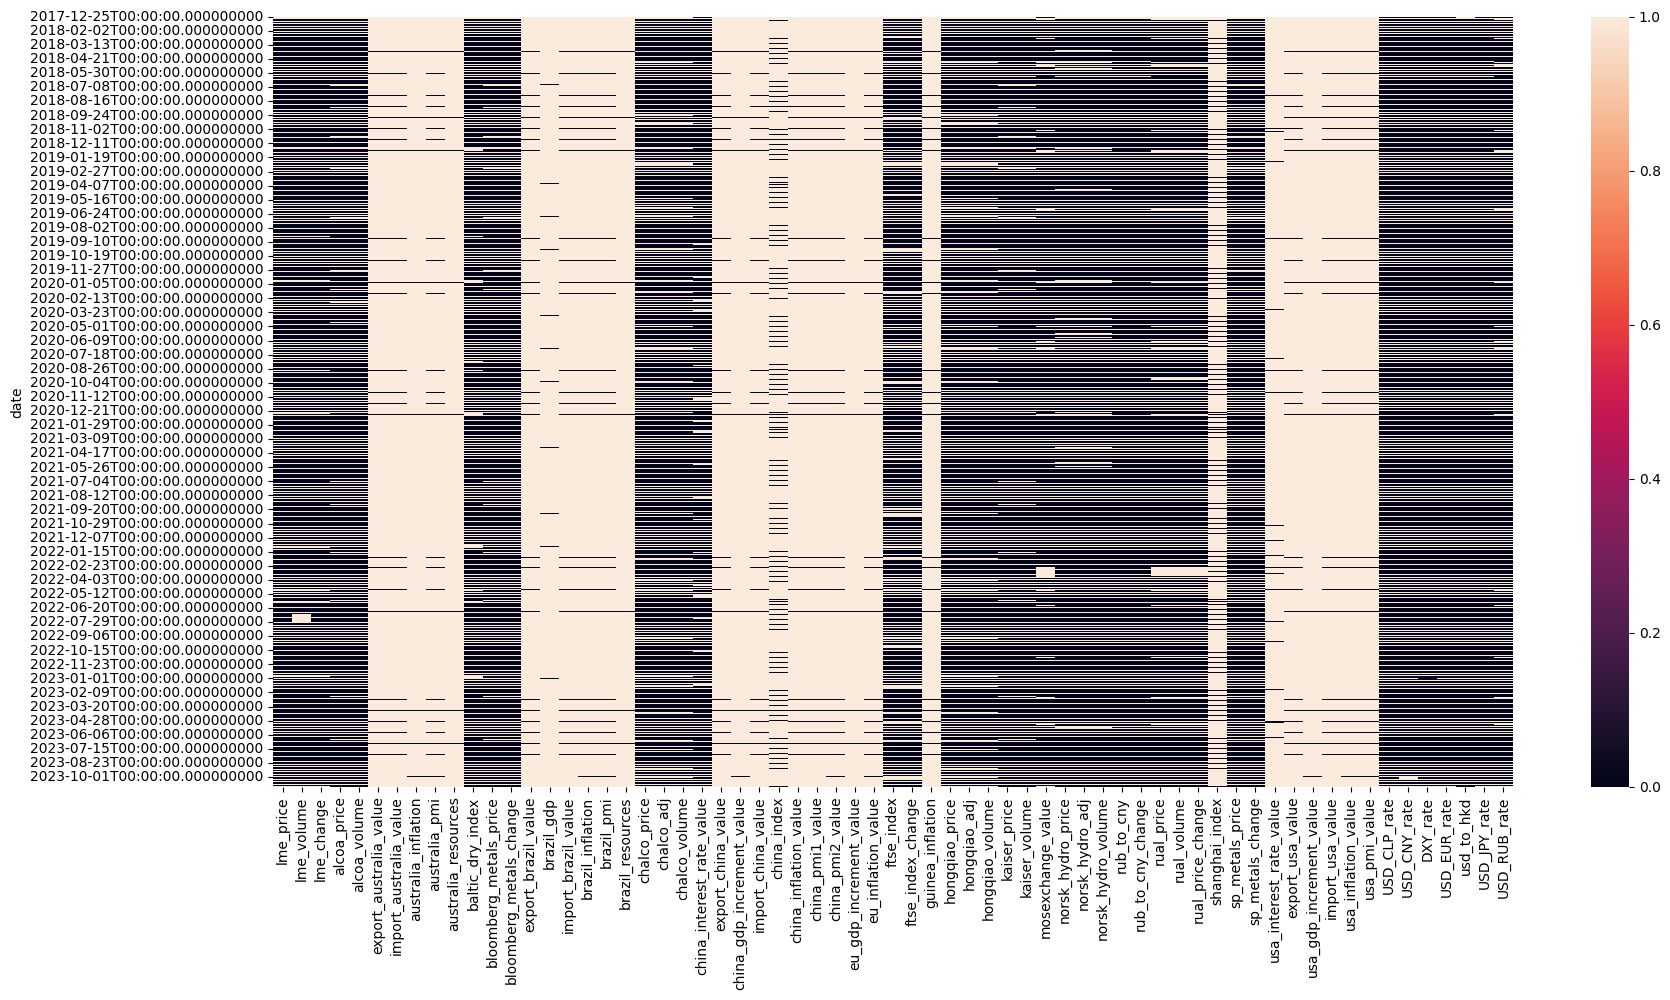

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna())

В некоторых колонках значение выпало на выходной (обычно это данные, которые обновляются помесячно и записываются в первый или последний день месяца)  
Можно интерполировать во времени в том числе и для выходных, все равно впоследствии будет произведен переход на еженедельные данные с агрегацией среднего или медианы, что не вызовет искажения в распределении данных

In [9]:
df.columns

Index(['lme_price', 'lme_volume', 'lme_change', 'alcoa_price', 'alcoa_volume',
       'export_australia_value', 'import_australia_value',
       'australia_inflation', 'australia_pmi', 'australia_resources',
       'baltic_dry_index', 'bloomberg_metals_price', 'bloomberg_metals_change',
       'export_brazil_value', 'brazil_gdp', 'import_brazil_value',
       'brazil_inflation', 'brazil_pmi', 'brazil_resources', 'chalco_price',
       'chalco_adj', 'chalco_volume', 'china_interest_rate_value',
       'export_china_value', 'china_gdp_increment_value', 'import_china_value',
       'china_index', 'china_inflation_value', 'china_pmi1_value',
       'china_pmi2_value', 'eu_gdp_increment_value', 'eu_inflation_value',
       'ftse_index', 'ftse_index_change', 'guinea_inflation', 'hongqiao_price',
       'hongqiao_adj', 'hongqiao_volume', 'kaiser_price', 'kaiser_volume',
       'mosexchange_value', 'norsk_hydro_price', 'norsk_hydro_adj',
       'norsk_hydro_volume', 'rub_to_cny', 'rub_to_cny_c

In [10]:
# Для ежемесячных и еженедедельных данных, отражающих прошедший период, используем заполнение пропусков с помощью bfill()
# Для ежедневных данных, прерывающихся преимущественно по выходным, используем линейную интерполяцию с методом 'time',
# чтобы данные заполнялись с учетом дня

In [11]:
df_bfill = df.loc[:,('china_index', 'shanghai_index',
                     'export_australia_value', 'import_australia_value', 'australia_inflation', 'australia_pmi', 'australia_resources',
                     'brazil_gdp', 'export_brazil_value', 'import_brazil_value', 'brazil_inflation', 'brazil_pmi', 'brazil_resources',
                     'china_gdp_increment_value', 'export_china_value', 'import_china_value',
                     'china_inflation_value', 'china_interest_rate_value', 'china_pmi1_value', 'china_pmi2_value',
                     'eu_gdp_increment_value', 'eu_inflation_value',
                     'guinea_inflation', 'usa_gdp_increment_value', 'export_usa_value', 'import_usa_value',
                     'usa_inflation_value', 'usa_pmi_value', 'usa_interest_rate_value')].bfill()

In [12]:
df_interpol = df.loc[:,('lme_price', 'lme_volume', 'lme_change',
                        'baltic_dry_index', 'bloomberg_metals_price', 'bloomberg_metals_change',
                        'ftse_index', 'ftse_index_change', 'sp_metals_price', 'sp_metals_change', 'mosexchange_value',
                        'alcoa_price', 'alcoa_volume', 'chalco_price', 'chalco_adj', 'chalco_volume', 
                        'hongqiao_price', 'hongqiao_adj', 'hongqiao_volume', 'kaiser_price', 'kaiser_volume', 
                        'norsk_hydro_price', 'norsk_hydro_adj', 'norsk_hydro_volume',
                        'rual_price', 'rual_volume','rual_price_change',
                        'rub_to_cny', 'rub_to_cny_change', 'usd_to_hkd',
                        'USD_CLP_rate', 'USD_CNY_rate', 'DXY_rate', 
                        'USD_EUR_rate', 'USD_JPY_rate', 'USD_RUB_rate')].interpolate(method='time', limit_area='inside')

In [13]:
df_after_fillna = pd.concat([df_interpol, df_bfill], axis=1)

In [14]:
df_after_fillna.isna().sum()[df_after_fillna.isna().sum()!=0]

lme_price                      9
lme_volume                     9
lme_change                     9
baltic_dry_index               8
bloomberg_metals_price         8
bloomberg_metals_change        8
ftse_index                     8
ftse_index_change              8
sp_metals_price                8
sp_metals_change               8
mosexchange_value              1
alcoa_price                    8
alcoa_volume                   8
chalco_price                   9
chalco_adj                     9
chalco_volume                  9
hongqiao_price                 9
hongqiao_adj                   9
hongqiao_volume                9
kaiser_price                   8
kaiser_volume                  8
norsk_hydro_price              8
norsk_hydro_adj                8
norsk_hydro_volume             8
rual_price                     9
rual_volume                    9
rual_price_change              9
rub_to_cny                     8
rub_to_cny_change              8
usd_to_hkd                     8
USD_CLP_ra

<Axes: ylabel='date'>

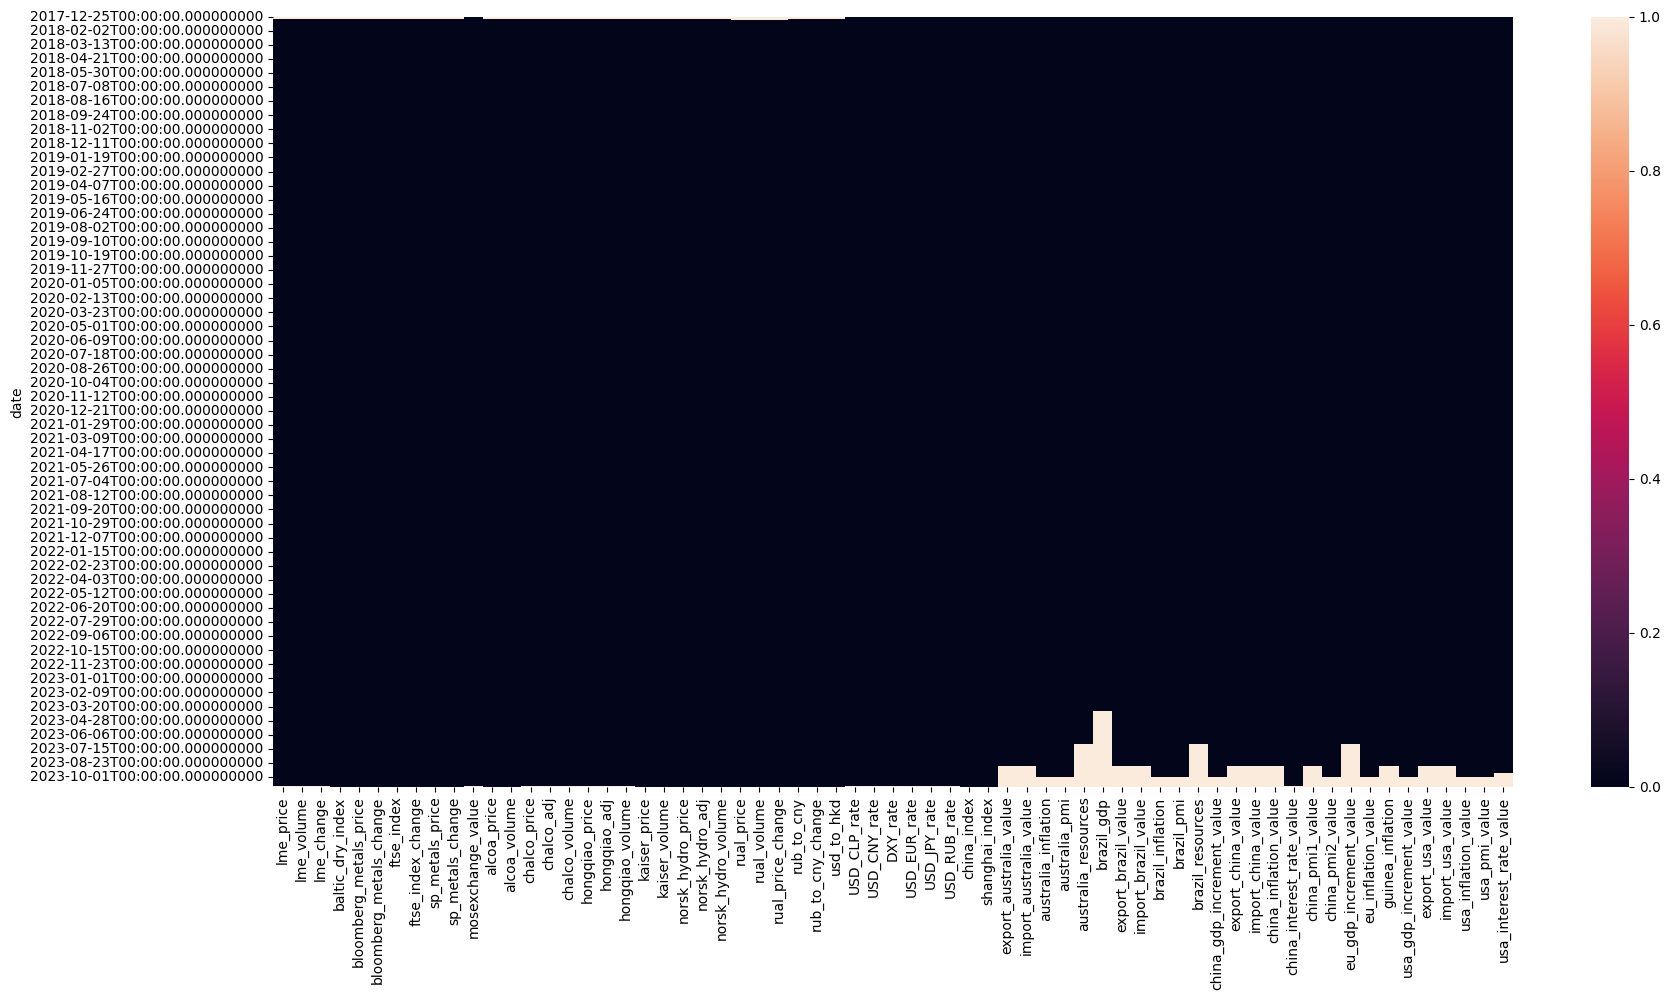

In [15]:
plt.figure(figsize=(20,10))
sns.heatmap(df_after_fillna.isna())

In [16]:
# Можно заметить, что пустыми остались данные, которые на момент сбора данных (27-28 октября) отсутствовали, то есть поступают с задержкой
# Некоторые данные поступают с слишком большой задержкой
# Заметим, что лаг для australia_resources, brazil_gdp, brazil_resources, eu_gdp_increment_value слишком велик, при смещении мы потеряем много данных от тренировочного набора
df_after_fillna.drop(columns=['australia_resources', 'brazil_gdp', 'brazil_resources', 'eu_gdp_increment_value'], inplace=True)

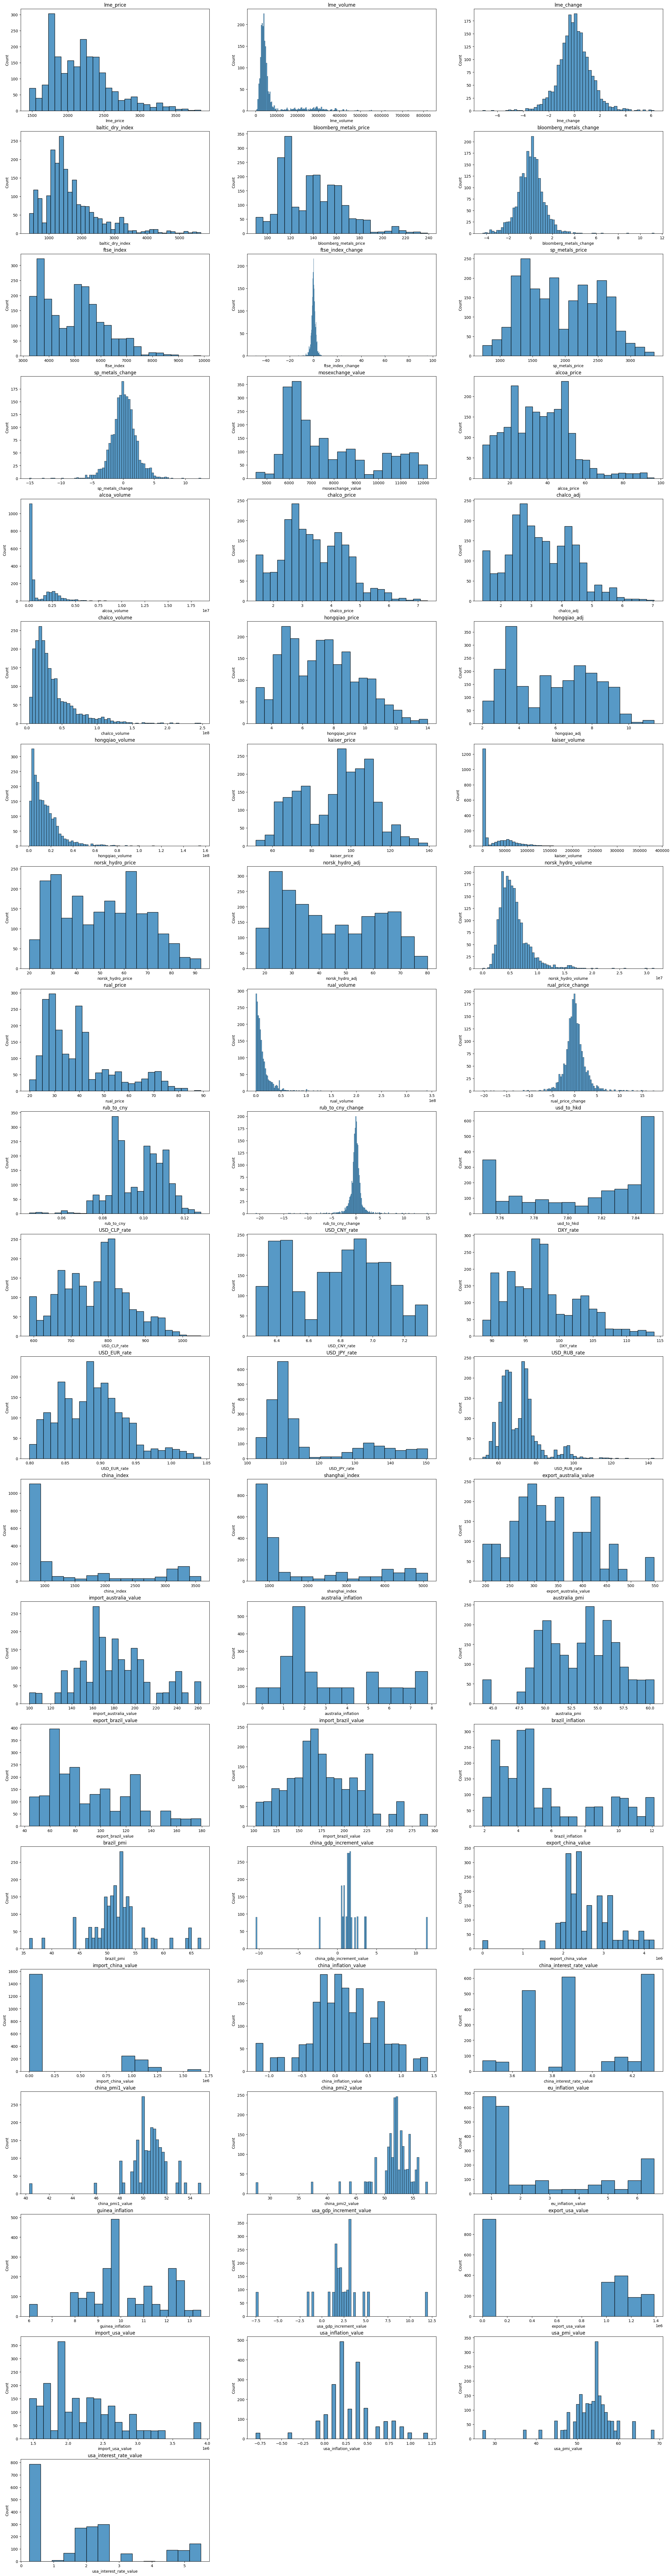

In [17]:
fig = plt.figure(figsize=(30,120))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1)
k=1
for i in df_after_fillna.columns:
    plt.subplot(21,3,k)
    sns.histplot(df_after_fillna, x=str(i))
    plt.title(i)
    k+=1
# plt.savefig('distributions.png', dpi=400)

In [18]:
# Анализ гистограмм распределения параметров позволяет сделать вывод, что данные извлечены без ошибок, выбросов нет, диапазоны значений кондиционные
# Некоторые данные можно логарифмировать
# Например:

In [19]:
df_after_fillna['log10_lme_volume'] = np.log10(df_after_fillna.lme_volume)
df_after_fillna['log10_alcoa_volume'] = np.log10(df_after_fillna.alcoa_volume)
df_after_fillna['log10_hongqiao_volume'] = np.log10(df_after_fillna.hongqiao_volume)
df_after_fillna['log10_kaiser_volume'] = np.log10(df_after_fillna.kaiser_volume)
df_after_fillna['log10_rual_volume'] = np.log10(df_after_fillna.rual_volume)
df_after_fillna['log10_chalco_volume'] = np.log10(df_after_fillna.chalco_volume)
df_after_fillna['log10_norsk_hydro_volume'] = np.log10(df_after_fillna.norsk_hydro_volume)

/Users/epsilon/miniconda3/envs/etna/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [20]:
# Где-то прологарифмировали нулевое значение
df_after_fillna[df_after_fillna.norsk_hydro_volume==0]

lme_price  lme_volume  lme_change  baltic_dry_index  \
date                                                              
2019-04-17     1850.0     90320.0       -0.31             767.0   

            bloomberg_metals_price  bloomberg_metals_change  ftse_index  \
date                                                                      
2019-04-17                  121.15                     0.41     4529.76   

            ftse_index_change  sp_metals_price  sp_metals_change  \
date                                                               
2019-04-17              -0.09           1507.2             -0.04   

            mosexchange_value  alcoa_price  alcoa_volume  chalco_price  \
date                                                                     
2019-04-17             6476.3        27.98     4313929.0          3.37   

            chalco_adj  chalco_volume  hongqiao_price  hongqiao_adj  \
date                                                                  
2019-04-17    3.292372     38408081.0            6.59      4.355623   

            hongqiao_volume  kaiser_price  kaiser_volume  norsk_hydro_price  \
date                                                                          
2019-04-17       13300130.0        105.99        60491.0          38.720001   

            norsk_hydro_adj  norsk_hydro_volume  rual_price  ...  \
date                                                         ...   
2019-04-17        30.514101                 0.0      28.985  ...   

            import_brazil_value  brazil_inflation  brazil_pmi  \
date                                                            
2019-04-17              166.142              4.94        51.5   

            china_gdp_increment_value  export_china_value  import_china_value  \
date                                                                            
2019-04-17                        1.5           2125053.0             525.754   

            china_inflation_value  china_interest_rate_value  \
date                                                           
2019-04-17                    0.1                       4.31   

            china_pmi1_value  china_pmi2_value  eu_inflation_value  \
date                                                                 
2019-04-17              50.2              52.7                 1.4   

            guinea_inflation  usa_gdp_increment_value  export_usa_value  \
date                                                                      
2019-04-17               9.5                      2.2         1012033.0   

            import_usa_value  usa_inflation_value  usa_pmi_value  \
date                                                               
2019-04-17         1908083.0                  0.4           53.0   

            usa_interest_rate_value  log10_lme_volume  log10_alcoa_volume  \
date                                                                        
2019-04-17                      2.5          4.955784            6.634873   

            log10_hongqiao_volume  log10_kaiser_volume  log10_rual_volume  \
date                                                                        
2019-04-17               7.123856             4.781691           7.157154   

            log10_chalco_volume  log10_norsk_hydro_volume  
date                                                       
2019-04-17             7.584423                      -inf  

[1 rows x 68 columns]

In [21]:
replace_t = np.nanquantile(df_after_fillna.norsk_hydro_volume.values, 0.001)
df_after_fillna['norsk_hydro_volume'] = df_after_fillna['norsk_hydro_volume'].replace(0, replace_t)


In [22]:
# повторим
df_after_fillna['log10_lme_volume'] = np.log10(df_after_fillna.lme_volume)
df_after_fillna['log10_alcoa_volume'] = np.log10(df_after_fillna.alcoa_volume)
df_after_fillna['log10_hongqiao_volume'] = np.log10(df_after_fillna.hongqiao_volume)
df_after_fillna['log10_kaiser_volume'] = np.log10(df_after_fillna.kaiser_volume)
df_after_fillna['log10_rual_volume'] = np.log10(df_after_fillna.rual_volume)
df_after_fillna['log10_chalco_volume'] = np.log10(df_after_fillna.chalco_volume)
df_after_fillna['log10_norsk_hydro_volume'] = np.log10(df_after_fillna.norsk_hydro_volume)

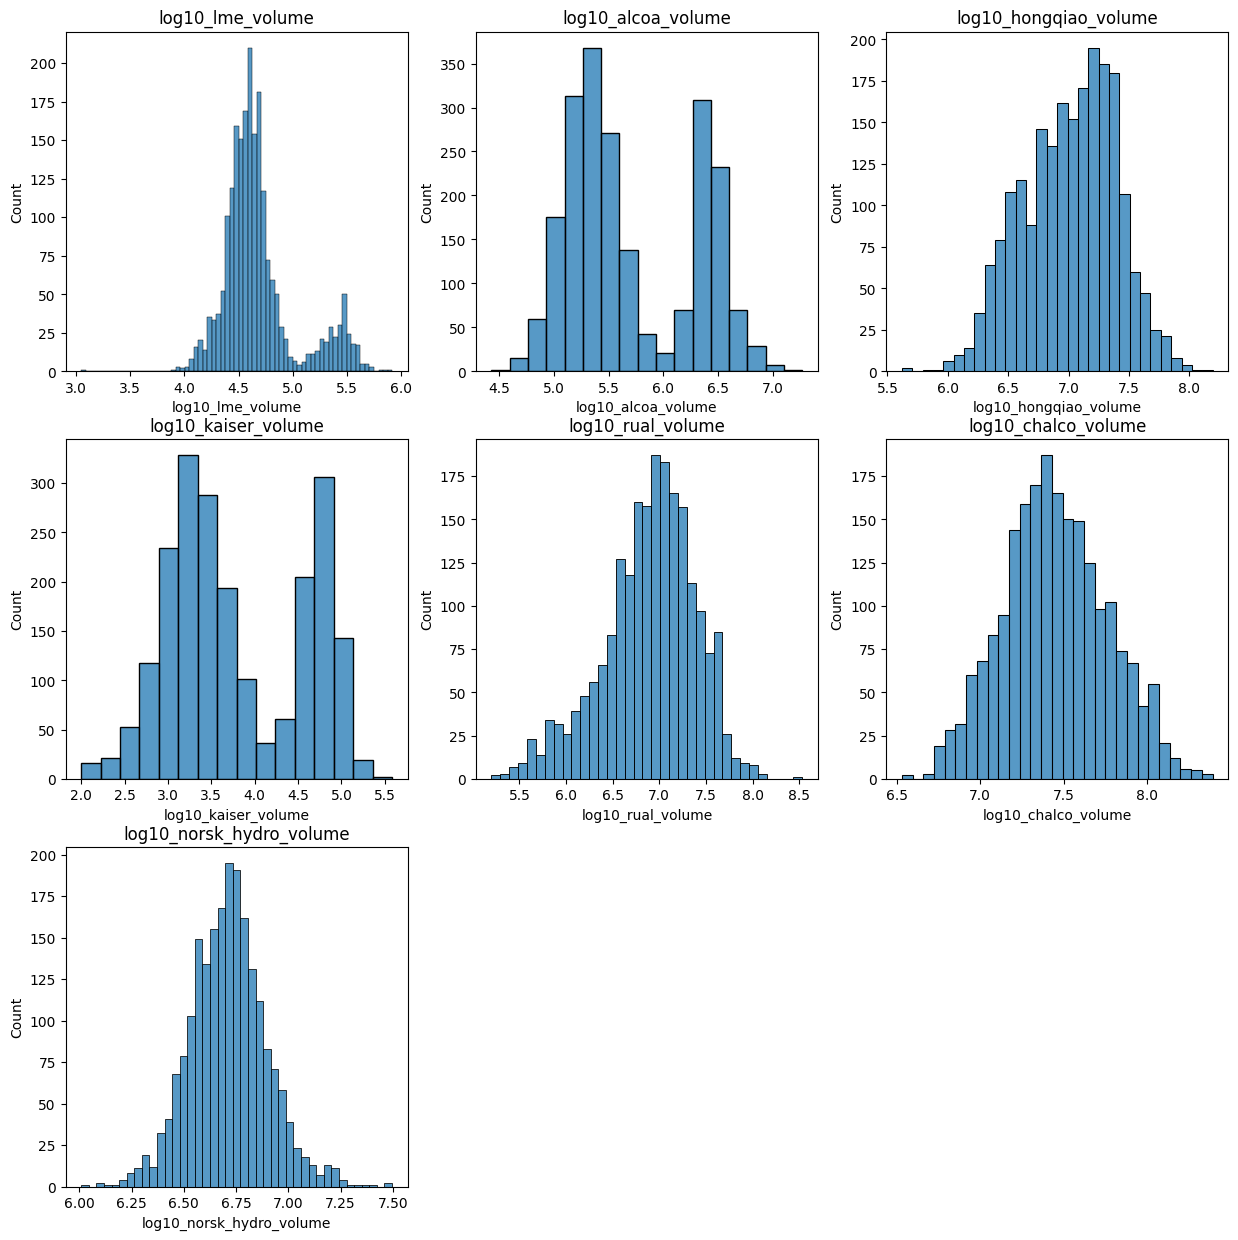

In [23]:
fig = plt.figure(figsize=(15,15))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1)
k=1
for i in ['log10_lme_volume', 'log10_alcoa_volume', 'log10_hongqiao_volume', 'log10_kaiser_volume', 'log10_rual_volume', 'log10_chalco_volume', 'log10_norsk_hydro_volume']:
    plt.subplot(3,3,k)
    sns.histplot(df_after_fillna[i])
    plt.title(i)
    k+=1

In [24]:
df_after_fillna.columns

Index(['lme_price', 'lme_volume', 'lme_change', 'baltic_dry_index',
       'bloomberg_metals_price', 'bloomberg_metals_change', 'ftse_index',
       'ftse_index_change', 'sp_metals_price', 'sp_metals_change',
       'mosexchange_value', 'alcoa_price', 'alcoa_volume', 'chalco_price',
       'chalco_adj', 'chalco_volume', 'hongqiao_price', 'hongqiao_adj',
       'hongqiao_volume', 'kaiser_price', 'kaiser_volume', 'norsk_hydro_price',
       'norsk_hydro_adj', 'norsk_hydro_volume', 'rual_price', 'rual_volume',
       'rual_price_change', 'rub_to_cny', 'rub_to_cny_change', 'usd_to_hkd',
       'USD_CLP_rate', 'USD_CNY_rate', 'DXY_rate', 'USD_EUR_rate',
       'USD_JPY_rate', 'USD_RUB_rate', 'china_index', 'shanghai_index',
       'export_australia_value', 'import_australia_value',
       'australia_inflation', 'australia_pmi', 'export_brazil_value',
       'import_brazil_value', 'brazil_inflation', 'brazil_pmi',
       'china_gdp_increment_value', 'export_china_value', 'import_china_value'

In [27]:
# Анализ на выбросы
# ftse_index, mosexchange_value, log10_lme_volume

In [28]:
drop = ['alcoa_volume', 'chalco_volume', 'lme_volume', 'hongqiao_volume', 'kaiser_volume',
        'norsk_hydro_volume', 'rual_volume', 'import_china_value', 'china_interest_rate_value']
df_after_fillna.drop(columns=drop, inplace=True)

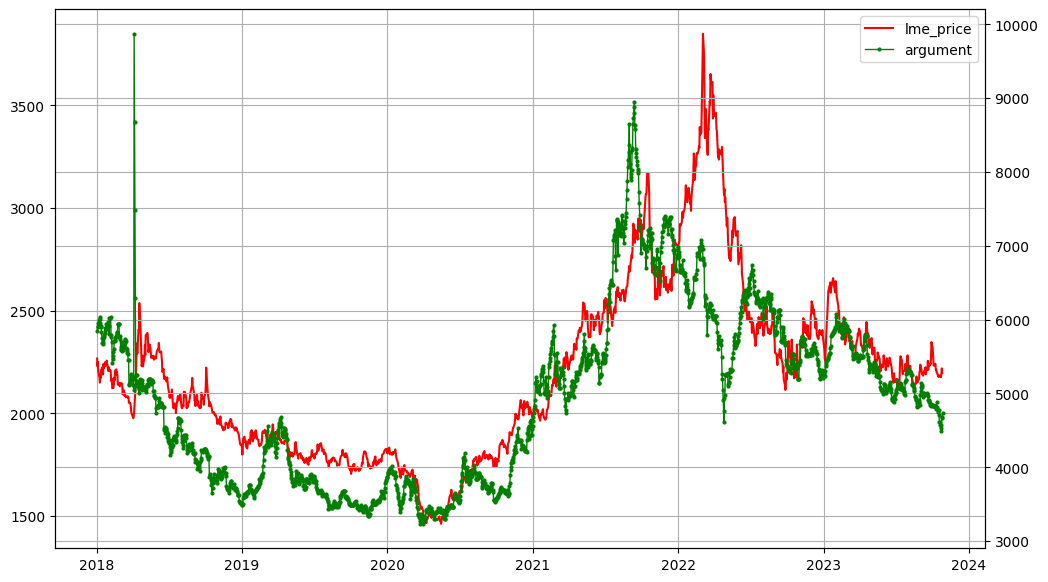

In [29]:
fig, ax = plt.subplots(figsize=(12, 7))
l1, = ax.plot(df_after_fillna.index.values, df_after_fillna.lme_price.values, color='r')
ax1 = ax.twinx()
l2, = ax1.plot(df_after_fillna.index.values, df_after_fillna.ftse_index, color='g', marker='o', linewidth=1, markersize=2)
ax1.legend([l1,l2],['lme_price', 'argument'])
#ax1.set_ylim([0,1e6])
ax.grid(True)
ax1.grid(True)

In [30]:
# Введем ковид и 24 февраля
df_after_fillna['covid']=np.where(df_after_fillna.index<='2021-03-01', 1, 0)
df_after_fillna['after_feb']=np.where(df_after_fillna.index<='2022-07-01', 1, 0)

df_after_fillna['covid'] = np.where(df_after_fillna.index>='2020-03-15', df_after_fillna['covid'].ewm(alpha=.01).mean(), 0)
df_after_fillna['after_feb'] = np.where(df_after_fillna.index>='2022-03-15', df_after_fillna['after_feb'].ewm(alpha=.004).mean(), 0)

<Axes: xlabel='date'>

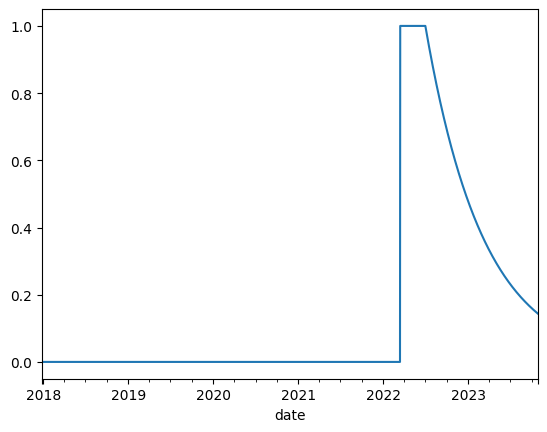

In [31]:
df_after_fillna.after_feb.plot()

<Axes: xlabel='date'>

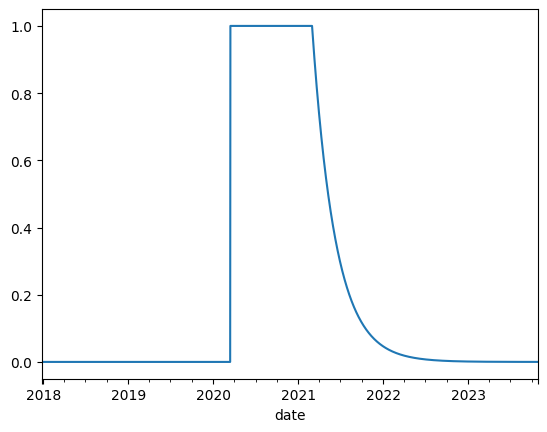

In [32]:
df_after_fillna.covid.plot()

In [33]:
# Можно сгладить кривую стоимости
df_after_fillna['lme_price_smooth'] = df_after_fillna.lme_price.rolling(7, min_periods=1).mean()

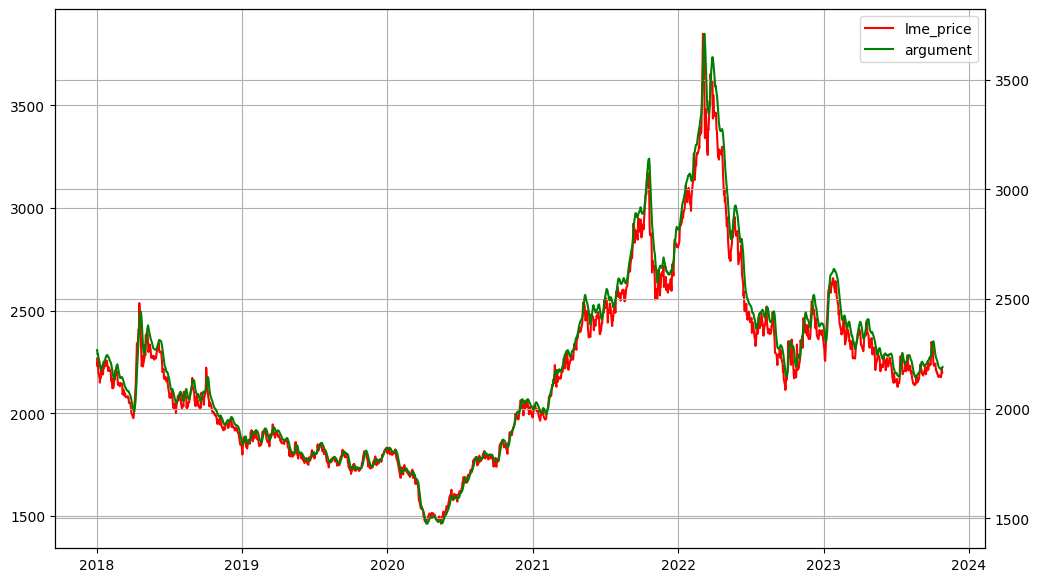

In [34]:
fig, ax = plt.subplots(figsize=(12, 7))
l1, = ax.plot(df_after_fillna.index.values, df_after_fillna.lme_price.values, color='r')
ax1 = ax.twinx()
l2, = ax1.plot(df_after_fillna.index.values, df_after_fillna.lme_price_smooth, color='g')
ax1.legend([l1,l2],['lme_price', 'argument'])
#ax1.set_ylim([0,1e6])
ax.grid(True)
ax1.grid(True)

In [35]:
# Произведем агрегацию данных в недельные дискреты
dataset_per_week = df_after_fillna.reset_index().groupby([pd.Grouper(key='date', freq='W')]).mean()

In [36]:
dataset_per_week

lme_price  lme_change  baltic_dry_index  bloomberg_metals_price  \
date                                                                            
2017-12-31          NaN         NaN               NaN                     NaN   
2018-01-07  2220.333333   -1.088333       1326.666667              136.576667   
2018-01-14  2188.428571    0.400000       1324.428571              135.854286   
2018-01-21  2219.250000    0.122857       1166.714286              135.947143   
2018-01-28  2243.964286    0.125714       1193.571429              138.122857   
...                 ...         ...               ...                     ...   
2023-10-01  2286.785714    0.948571       1702.142857              141.880000   
2023-10-08  2258.571429   -0.604286       1853.000000              139.278571   
2023-10-15  2206.785714   -0.380000       1959.857143              137.274286   
2023-10-22  2180.500000   -0.174286       2045.000000              136.197143   
2023-10-29  2195.875000    0.187500       1804.600000              136.814000   

            bloomberg_metals_change   ftse_index  ftse_index_change  \
date                                                                  
2017-12-31                      NaN          NaN                NaN   
2018-01-07                -0.556667  5925.730000           0.680000   
2018-01-14                 0.073214  5912.715714          -0.545714   
2018-01-21                 0.044643  5738.675714          -0.047143   
2018-01-28                 0.311429  5899.810000           0.377143   
...                             ...          ...                ...   
2023-10-01                 0.194286  4844.472727          -0.200260   
2023-10-08                -0.318571  4836.127273          -0.025455   
2023-10-15                -0.327143  4814.168571          -0.457143   
2023-10-22                -0.085714  4651.592857          -1.014286   
2023-10-29                 0.284000  4629.970000           0.572000   

            sp_metals_price  sp_metals_change  mosexchange_value  alcoa_price  \
date                                                                            
2017-12-31              NaN               NaN        5784.003429          NaN   
2018-01-07      1886.516667          0.798333        5963.855500    54.508333   
2018-01-14      1923.292857          0.219286        6033.078929    55.765714   
2018-01-21      1931.792857         -0.132143        6065.811429    54.394286   
2018-01-28      1943.928571          0.051429        6070.498571    53.238571   
...                     ...               ...                ...          ...   
2023-10-01      2658.542857         -0.147143        8090.870000    27.670714   
2023-10-08      2592.371429         -0.048571        8140.408571    27.369286   
2023-10-15      2617.614286          0.057143        8195.837143    27.398571   
2023-10-22      2557.457143         -0.747143        8268.428571    25.244286   
2023-10-29      2510.200000          0.186000        8253.817500    23.660000   

            chalco_price  chalco_adj  hongqiao_price  hongqiao_adj  \
date                                                                 
2017-12-31           NaN         NaN             NaN           NaN   
2018-01-07      5.970000    5.827597        9.043333      5.941719   
2018-01-14      5.721429    5.521249        9.998571      6.574258   
2018-01-21      5.577143    5.525436       10.125714      6.629089   
2018-01-28      5.837143    5.673376       10.977143      7.079373   
...                  ...         ...             ...           ...   
2023-10-01      4.385714    4.360714        7.494286      7.548929   
2023-10-08      4.225714    4.249286        7.357143      7.354643   
2023-10-15      4.244286    4.202857        6.997143      6.864286   
2023-10-22      4.011786    3.945714        6.525357      6.511071   
2023-10-29      3.863125    3.925000        6.779375      6.909375   

            kaiser_price  norsk_hydro_price  norsk_hydro_adj  rual_pric

In [37]:
dataset_per_week.isna().sum()[dataset_per_week.isna().sum()>1]


export_australia_value       8
import_australia_value       8
australia_inflation          4
australia_pmi                4
export_brazil_value          8
import_brazil_value          8
brazil_inflation             4
brazil_pmi                   4
china_gdp_increment_value    4
export_china_value           8
china_inflation_value        8
china_pmi1_value             8
china_pmi2_value             4
eu_inflation_value           4
guinea_inflation             8
usa_gdp_increment_value      4
export_usa_value             8
import_usa_value             8
usa_inflation_value          4
usa_pmi_value                4
usa_interest_rate_value      5
dtype: int64

In [38]:
'''
# Соберем словарь для всех смещений
dict_for_shift = dict(zip(dataset_per_week.isna().sum()[dataset_per_week.isna().sum()>1].index.values, dataset_per_week.isna().sum()[dataset_per_week.isna().sum()>1].values))
'''
# Лучше собрать вручную, так как это рыночные данные
dict_for_shift = {
    "export_australia_value":9,
    "import_australia_value":9,
    "australia_inflation":9,
    "australia_pmi":9,
    "export_brazil_value":9,
    "import_brazil_value":9,
    "brazil_inflation":9,
    "brazil_pmi":9,
    "china_gdp_increment_value": 9,
    "export_china_value": 9,
    "china_inflation_value": 9,
    "china_pmi1_value": 9,
    "china_pmi2_value": 9,
    "eu_inflation_value": 9,
    "guinea_inflation": 9,
    "usa_gdp_increment_value": 9,
    "export_usa_value": 9,
    "import_usa_value": 9,
    "usa_inflation_value": 9,
    "usa_pmi_value": 9,
    "usa_interest_rate_value": 9
}

In [39]:
for i in dict_for_shift.items():
    print(i)

('export_australia_value', 9)
('import_australia_value', 9)
('australia_inflation', 9)
('australia_pmi', 9)
('export_brazil_value', 9)
('import_brazil_value', 9)
('brazil_inflation', 9)
('brazil_pmi', 9)
('china_gdp_increment_value', 9)
('export_china_value', 9)
('china_inflation_value', 9)
('china_pmi1_value', 9)
('china_pmi2_value', 9)
('eu_inflation_value', 9)
('guinea_inflation', 9)
('usa_gdp_increment_value', 9)
('export_usa_value', 9)
('import_usa_value', 9)
('usa_inflation_value', 9)
('usa_pmi_value', 9)
('usa_interest_rate_value', 9)


In [40]:
# Вводим смещения
for i in dict_for_shift.items():
    dataset_per_week[i[0]] = dataset_per_week[i[0]].shift(i[1])

In [41]:
# Удаляем строки, в которые вылезли Nan из-за смещения и последнюю "недонеделю"
dataset_per_week.dropna(inplace=True)
dataset_per_week = dataset_per_week.iloc[:-1]
dataset_per_week.shape

(295, 62)

In [43]:
# Пересмотрим 
# ftse_index, mosexchange_value, log10_lme_volume

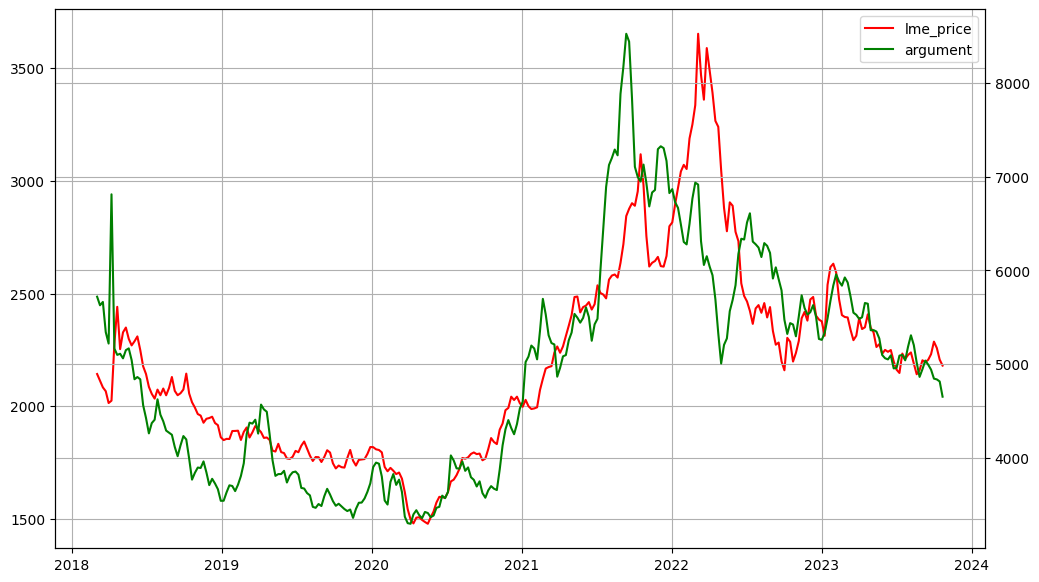

In [44]:
fig, ax = plt.subplots(figsize=(12, 7))
l1, = ax.plot(dataset_per_week.index.values, dataset_per_week.lme_price.values, color='r')
ax1 = ax.twinx()
l2, = ax1.plot(dataset_per_week.index.values, dataset_per_week.ftse_index, color='g')
ax1.legend([l1,l2],['lme_price', 'argument'])
#ax1.set_ylim([0,1e6])
ax.grid(True)
ax1.grid(True)

In [50]:
original_price = dataset_per_week[['lme_price']].copy(deep=True)
original_price.to_csv('../data/processed/original_price.csv')
dataset_per_week = dataset_per_week.drop(columns=['lme_price'])
dataset_per_week.to_csv('../data/processed/dataset_per_week_without_agg.csv')

In [2]:
dataset_per_week = pd.read_csv('../data/processed/dataset_per_week_without_agg.csv', parse_dates=True, index_col=0)
dataset_per_week.shape

(295, 61)

In [3]:
# Тест Дикки-Фуллера с alpha уровнем значимости
def check_stationarity(ts: list, alpha: float):
    dftest = adfuller(ts)
    adf, pvalue, critical_value = dftest[0], dftest[1], dftest[4]['5%']
    if (pvalue < alpha) and (adf < critical_value):
        print('The series is stationary')
    else:
        print('The series is NOT stationary')

In [6]:
check_stationarity(dataset_per_week.lme_price_smooth, 0.05)

The series is NOT stationary


In [7]:
# Задача прогнозирования на месяц подразумевает 4 прогноза (на одну, две, три и четыре недели вперед)
# Поэтому будем смещать таргет на одну, две, три и четыре позиции
# Заметим, что ряд цены на алюминий не прошел проверку на стационарность, ввиду чего лучше работать с дифференцированным рядом
dataset_per_week['target_1'] = dataset_per_week.lme_price_smooth.diff(periods=1)
dataset_per_week['target_2'] = dataset_per_week.lme_price_smooth.diff(periods=2)
dataset_per_week['target_3'] = dataset_per_week.lme_price_smooth.diff(periods=3)
dataset_per_week['target_4'] = dataset_per_week.lme_price_smooth.diff(periods=4)

In [8]:
# Проведем тест на стационарность для нового таргета с уровнем значимости 0.01
check_stationarity(dataset_per_week.target_1[1:], 0.01)
check_stationarity(dataset_per_week.target_2[2:], 0.01)
check_stationarity(dataset_per_week.target_3[3:], 0.01)
check_stationarity(dataset_per_week.target_4[4:], 0.05)
# Дифференцирование 4ого порядка не дает стационарность на уровне значимости 0.01

The series is stationary
The series is stationary
The series is stationary
The series is stationary


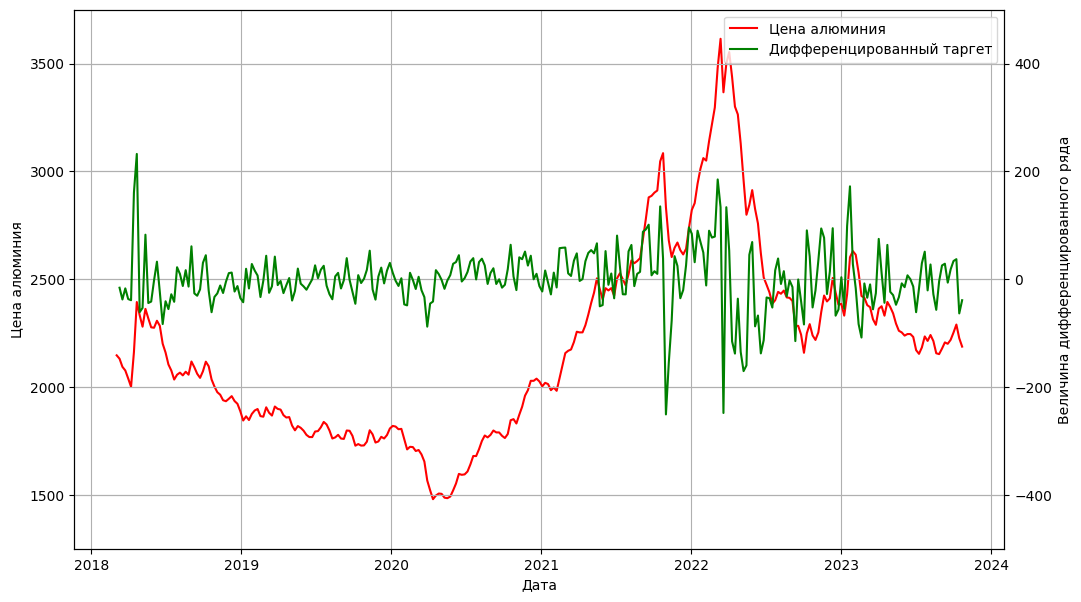

In [9]:
fig, ax = plt.subplots(figsize=(12, 7))
l1, = ax.plot(dataset_per_week.index, dataset_per_week.lme_price_smooth.values, color='r')
ax1 = ax.twinx()
l2, = ax1.plot(dataset_per_week.index, dataset_per_week.target_1.values, color='g')
ax1.legend([l1,l2],['Цена алюминия', 'Дифференцированный таргет'])
ax.set_ylim(1250,3750)
ax.set_ylabel('Цена алюминия')
ax.grid(True)
ax1.set_ylim(-500,500)
ax1.set_ylabel('Величина дифференцированного ряда')
ax1.grid(True)
ax.set_xlabel('Дата');

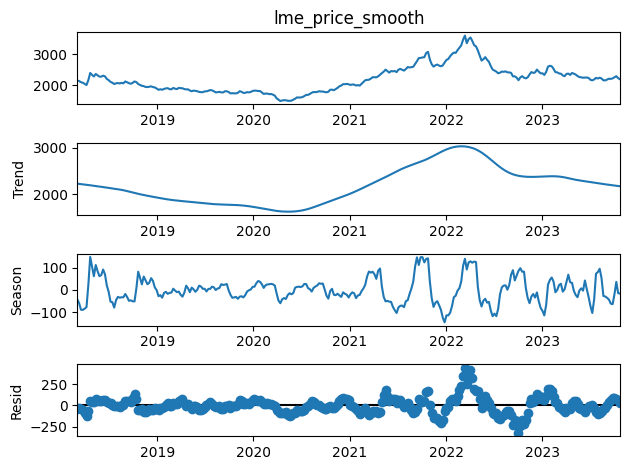

In [10]:
# Проанализируем таргет на тренд и сезонность с помощью алгоритма STL
stl = STL(dataset_per_week.lme_price_smooth, period=26)
res = stl.fit()
#plt.figure(figsize=(12,7))
fig = res.plot()

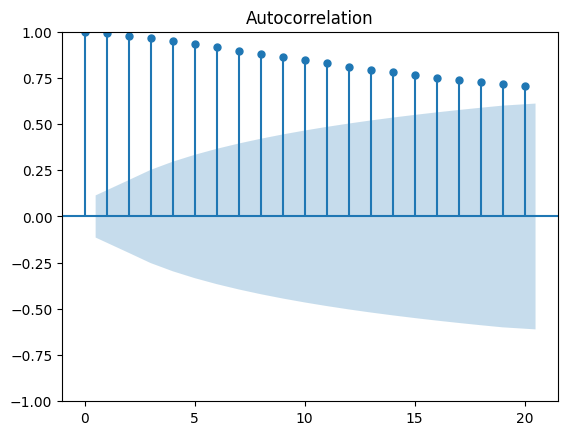

In [11]:
plot_acf(dataset_per_week.lme_price_smooth, lags = 20)
plt.show()

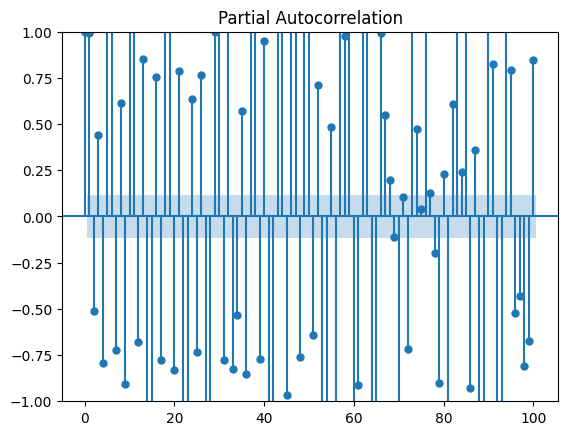

In [12]:
plot_pacf(dataset_per_week.lme_price_smooth, method='yw', lags = 100)
plt.show()

In [13]:
# Визуализируем ряды

In [14]:
dataset_per_week.describe().loc['mean'].sort_values()

rub_to_cny_change           -3.921065e-02
bloomberg_metals_change      6.934625e-03
lme_change                   7.559322e-03
rual_price_change            6.291283e-02
sp_metals_change             6.354479e-02
ftse_index_change            8.220339e-02
rub_to_cny                   9.677085e-02
target_1                     1.374196e-01
china_inflation_value        1.385956e-01
after_feb                    1.555547e-01
covid                        2.183988e-01
usa_inflation_value          3.079903e-01
target_2                     4.624748e-01
USD_EUR_rate                 8.907819e-01
target_3                     1.135594e+00
china_gdp_increment_value    1.325375e+00
target_4                     1.743817e+00
usa_interest_rate_value      1.842857e+00
usa_gdp_increment_value      2.227797e+00
eu_inflation_value           2.443186e+00
australia_inflation          3.156416e+00
chalco_adj                   3.262164e+00
chalco_price                 3.331510e+00
log10_kaiser_volume          3.767

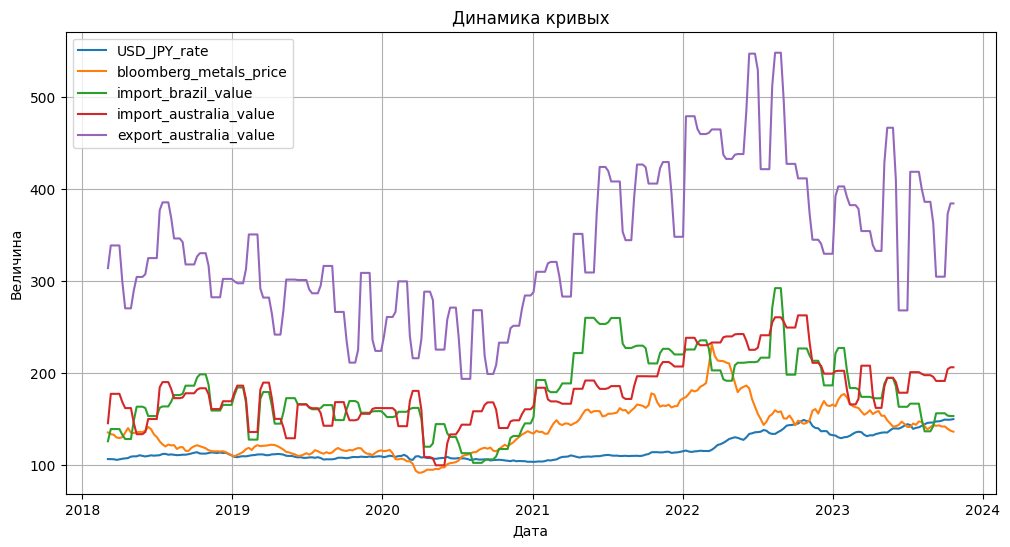

In [15]:
plt.figure(figsize=(12, 6))
for column in ['USD_JPY_rate', 'bloomberg_metals_price', 'import_brazil_value', 'import_australia_value', 'export_australia_value']:
    plt.plot(dataset_per_week.index, dataset_per_week[column], label=column)

plt.title('Динамика кривых')
plt.xlabel('Дата')
plt.ylabel('Величина')
plt.legend()
plt.grid(True)
plt.show()

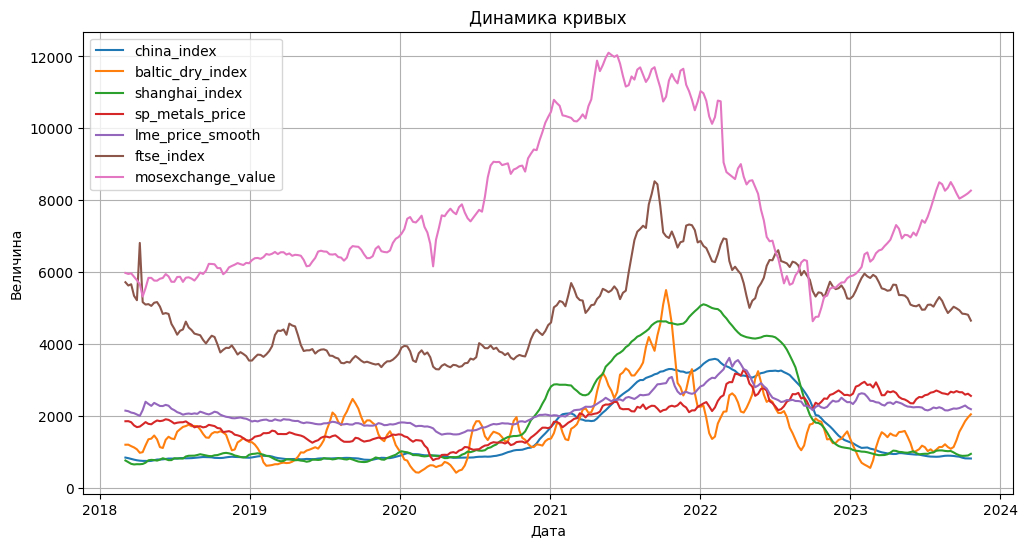

In [16]:
plt.figure(figsize=(12, 6))
for column in ['china_index', 'baltic_dry_index', 'shanghai_index', 'sp_metals_price', 'lme_price_smooth', 'ftse_index', 'mosexchange_value']:
    plt.plot(dataset_per_week.index, dataset_per_week[column], label=column)

plt.title('Динамика кривых')
plt.xlabel('Дата')
plt.ylabel('Величина')
plt.legend()
plt.grid(True)
plt.show()

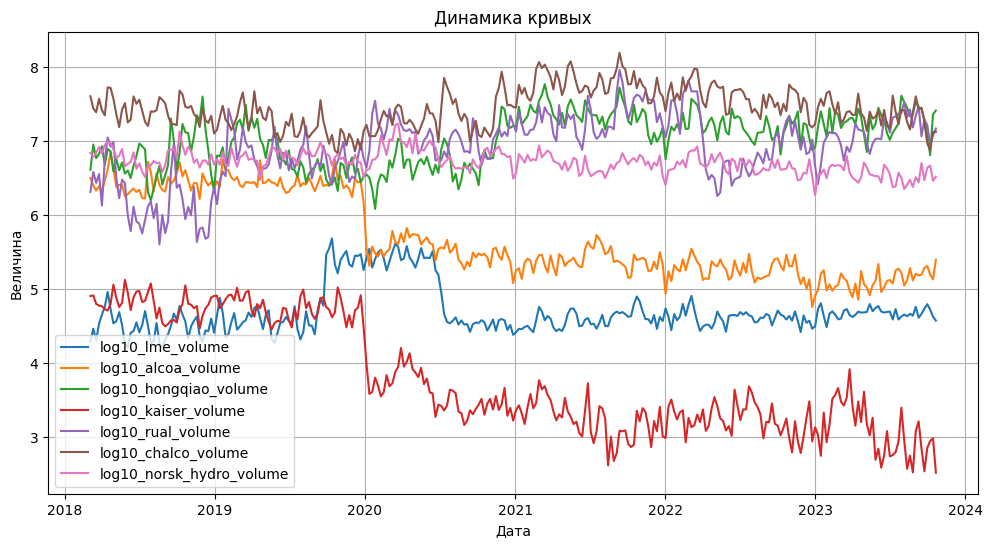

In [17]:
plt.figure(figsize=(12, 6))
for column in ['log10_lme_volume',
       'log10_alcoa_volume', 'log10_hongqiao_volume', 'log10_kaiser_volume',
       'log10_rual_volume', 'log10_chalco_volume', 'log10_norsk_hydro_volume']:
    plt.plot(dataset_per_week.index, dataset_per_week[column], label=column)

plt.title('Динамика кривых')
plt.xlabel('Дата')
plt.ylabel('Величина')
plt.legend()
plt.grid(True)
plt.show()

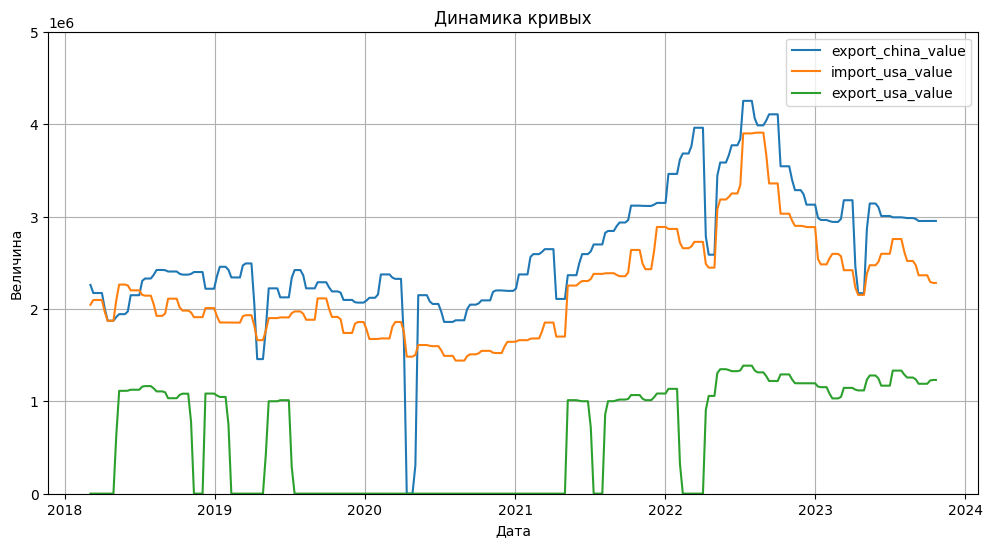

In [18]:
plt.figure(figsize=(12, 6))
for column in ['export_china_value', 'import_usa_value', 'export_usa_value']:
    plt.plot(dataset_per_week.index, dataset_per_week[column], label=column)

plt.title('Динамика кривых')
plt.xlabel('Дата')
plt.ylabel('Величина')
plt.ylim(0.0, 0.5e7)
plt.legend()
plt.grid(True)
plt.show()

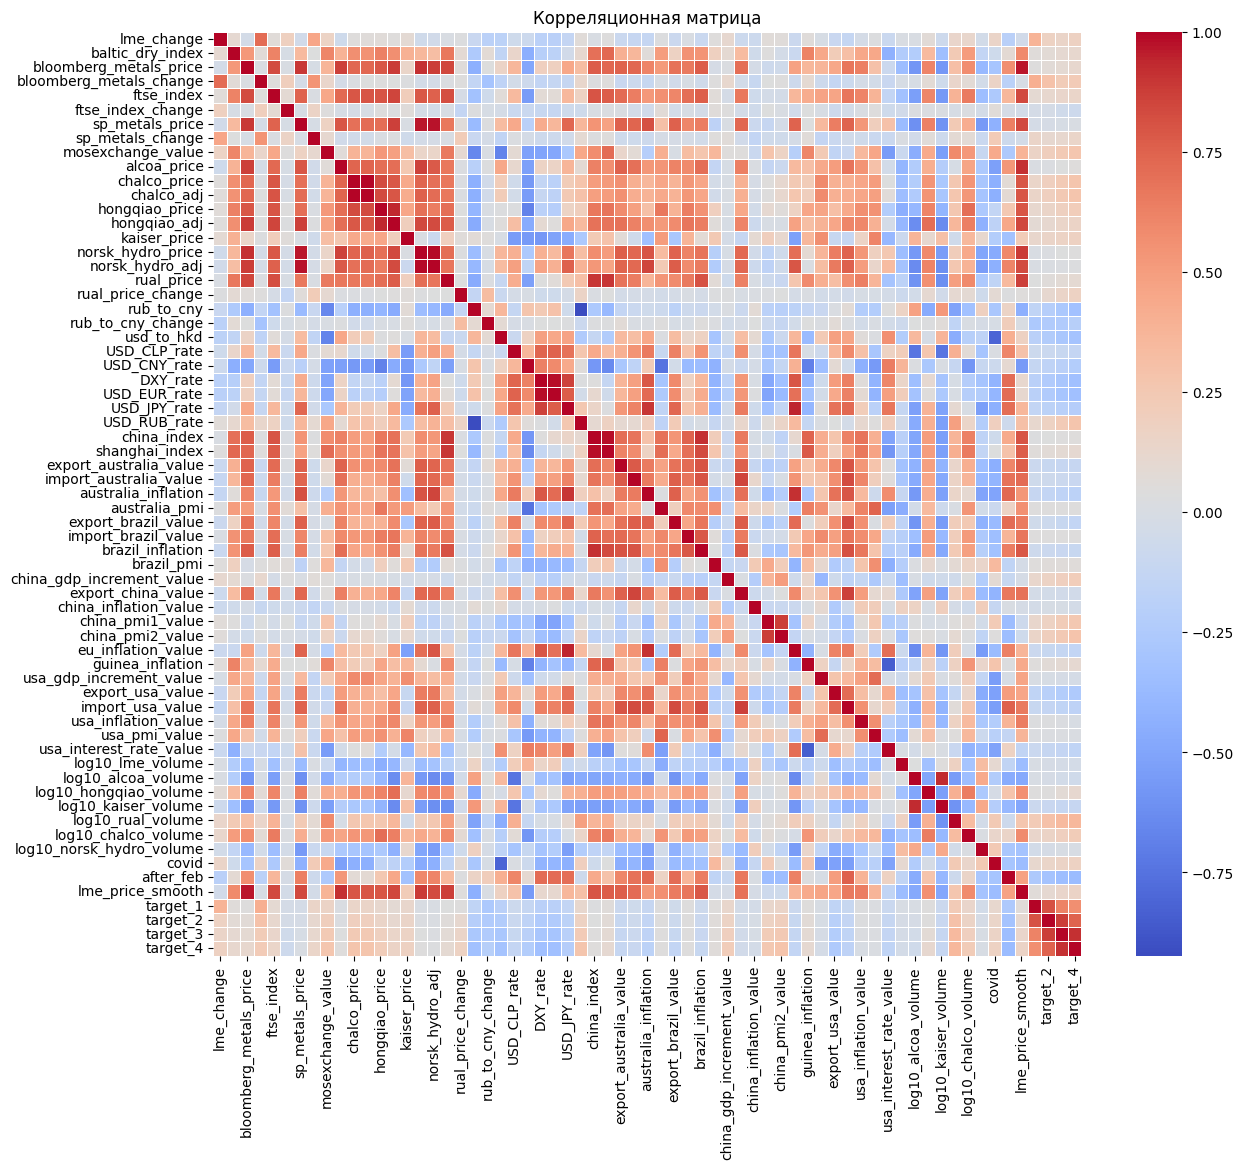

In [19]:
# Вычисление корреляций между продажами
correlation_matrix = dataset_per_week.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()

In [20]:
t = dataset_per_week.corr(method='spearman')
t.lme_price_smooth[abs(t.lme_price_smooth)>0.5].sort_values()

log10_alcoa_volume       -0.560940
log10_kaiser_volume      -0.548842
USD_CNY_rate             -0.546970
baltic_dry_index          0.535472
australia_pmi             0.598095
USD_JPY_rate              0.610322
log10_chalco_volume       0.612653
log10_hongqiao_volume     0.613908
usa_inflation_value       0.620364
export_usa_value          0.622634
australia_inflation       0.647361
shanghai_index            0.673462
export_brazil_value       0.687801
china_index               0.697370
export_china_value        0.730826
import_australia_value    0.755415
import_brazil_value       0.755632
brazil_inflation          0.761762
import_usa_value          0.797325
export_australia_value    0.814611
rual_price                0.817698
chalco_price              0.833410
chalco_adj                0.835495
sp_metals_price           0.873906
hongqiao_price            0.876768
norsk_hydro_adj           0.886809
hongqiao_adj              0.894510
alcoa_price               0.896926
norsk_hydro_price   

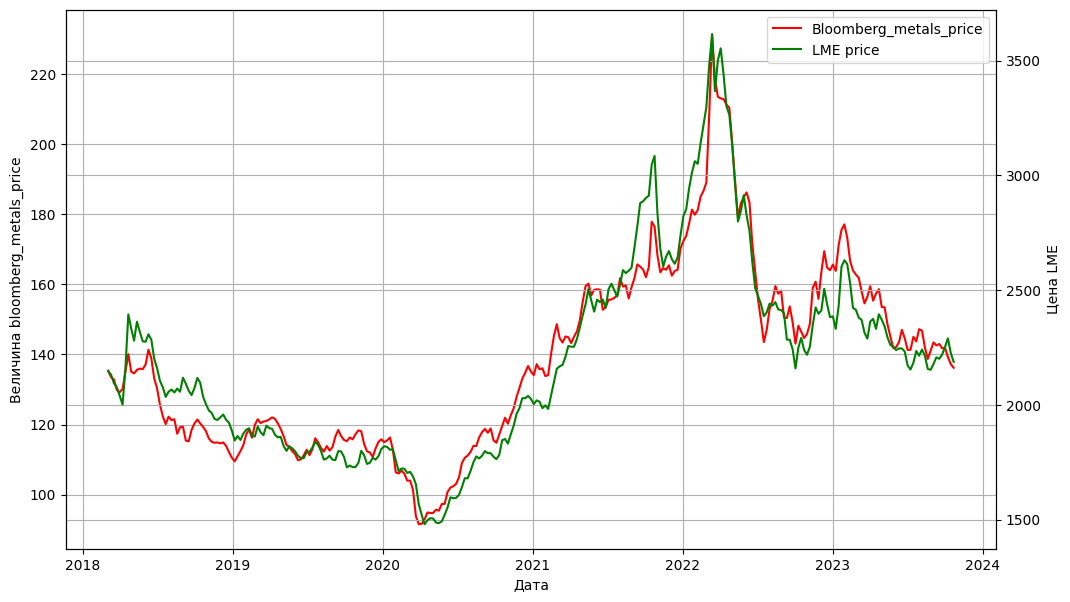

In [21]:
fig, ax = plt.subplots(figsize=(12, 7))
l1, = ax.plot(dataset_per_week.index, dataset_per_week.bloomberg_metals_price.values, color='r')
ax1 = ax.twinx()
l2, = ax1.plot(dataset_per_week.index, dataset_per_week.lme_price_smooth.values, color='g')
ax1.legend([l1,l2],['Bloomberg_metals_price', 'LME price'])
#ax.set_ylim(-2.5,2.5)
ax.set_ylabel('Величина bloomberg_metals_price')
ax.grid(True)
#ax1.set_ylim(-500,500)
ax1.set_ylabel('Цена LME')
ax1.grid(True)
ax.set_xlabel('Дата');

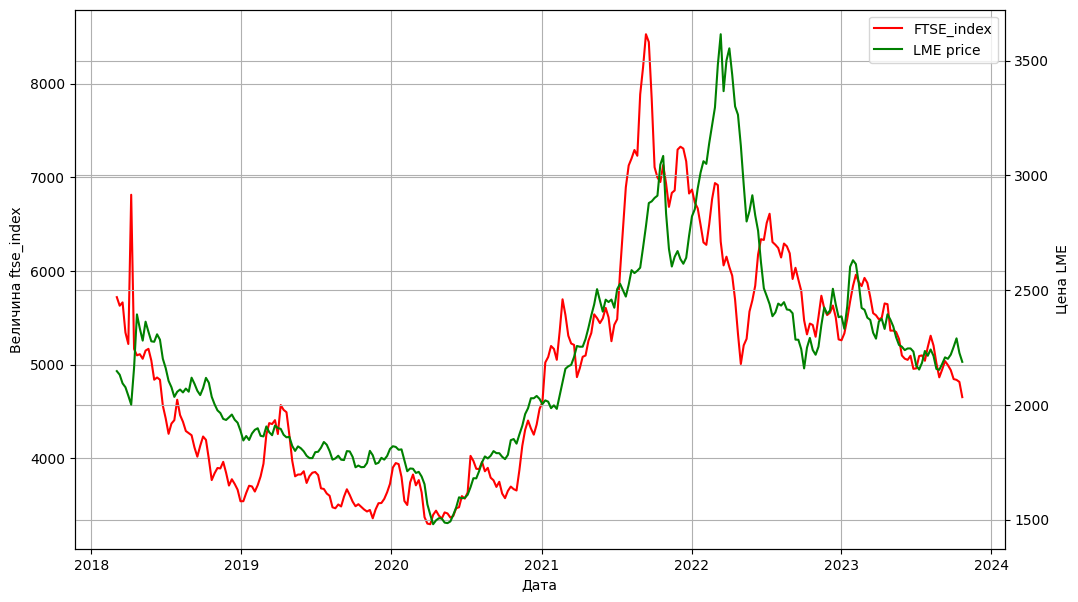

In [22]:
fig, ax = plt.subplots(figsize=(12, 7))
l1, = ax.plot(dataset_per_week.index, dataset_per_week.ftse_index.values, color='r')
ax1 = ax.twinx()
l2, = ax1.plot(dataset_per_week.index, dataset_per_week.lme_price_smooth.values, color='g')
ax1.legend([l1,l2],['FTSE_index', 'LME price'])
#ax.set_ylim(-2.5,2.5)
ax.set_ylabel('Величина ftse_index')
ax.grid(True)
#ax1.set_ylim(-500,500)
ax1.set_ylabel('Цена LME')
ax1.grid(True)
ax.set_xlabel('Дата');

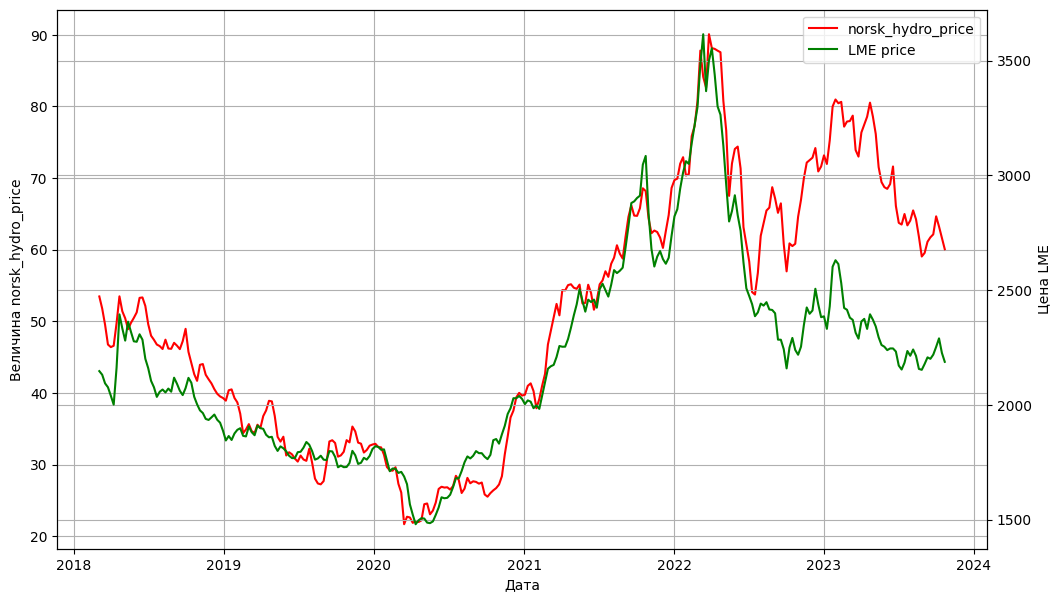

In [23]:
fig, ax = plt.subplots(figsize=(12, 7))
l1, = ax.plot(dataset_per_week.index, dataset_per_week.norsk_hydro_price.values, color='r')
ax1 = ax.twinx()
l2, = ax1.plot(dataset_per_week.index, dataset_per_week.lme_price_smooth.values, color='g')
ax1.legend([l1,l2],['norsk_hydro_price', 'LME price'])
#ax.set_ylim(-5,5)
ax.set_ylabel('Величина norsk_hydro_price')
ax.grid(True)
#ax1.set_ylim(-500,500)
ax1.set_ylabel('Цена LME')
ax1.grid(True)
ax.set_xlabel('Дата');

Введем агрегации

In [24]:
dataset_per_week = dataset_per_week.drop(columns=['target_1', 'target_2', 'target_3', 'target_4'])

In [25]:
list_of_columns = dataset_per_week.columns.copy()
list_of_columns = list_of_columns[:-1]
list_of_columns

Index(['lme_change', 'baltic_dry_index', 'bloomberg_metals_price',
       'bloomberg_metals_change', 'ftse_index', 'ftse_index_change',
       'sp_metals_price', 'sp_metals_change', 'mosexchange_value',
       'alcoa_price', 'chalco_price', 'chalco_adj', 'hongqiao_price',
       'hongqiao_adj', 'kaiser_price', 'norsk_hydro_price', 'norsk_hydro_adj',
       'rual_price', 'rual_price_change', 'rub_to_cny', 'rub_to_cny_change',
       'usd_to_hkd', 'USD_CLP_rate', 'USD_CNY_rate', 'DXY_rate',
       'USD_EUR_rate', 'USD_JPY_rate', 'USD_RUB_rate', 'china_index',
       'shanghai_index', 'export_australia_value', 'import_australia_value',
       'australia_inflation', 'australia_pmi', 'export_brazil_value',
       'import_brazil_value', 'brazil_inflation', 'brazil_pmi',
       'china_gdp_increment_value', 'export_china_value',
       'china_inflation_value', 'china_pmi1_value', 'china_pmi2_value',
       'eu_inflation_value', 'guinea_inflation', 'usa_gdp_increment_value',
       'export_usa_

In [26]:
for j in list_of_columns:
    for i in ['mean_4', 'mean_9', 'mean_13', 'mean_26', 'mean_52']:
        dataset_per_week[j+'_'+i] = dataset_per_week[j].rolling(int(i.split('_')[-1]), min_periods=1).mean()
    for i in ['shift_1', 'shift_2', 'shift_4', 'shift_9', 'shift_13']:
        dataset_per_week[j+'_'+i] = dataset_per_week[j].shift(int(i.split('_')[-1]))
    for i in ['std_4', 'std_9', 'std_13', 'std_26']:
        dataset_per_week[j+'_'+i] = dataset_per_week[j].rolling(int(i.split('_')[-1]), min_periods=1).std()
    for i in [1,2,4,9,13]:
        #dataset_per_week[j+'_relative_change_by_shift_'+str(i)] = dataset_per_week[j]/dataset_per_week[j+'_shift_'+str(i)]
        dataset_per_week[j+'_increment_by_shift_'+str(i)] = dataset_per_week[j]-dataset_per_week[j+'_shift_'+str(i)]
    for i in [4,9,13,26]:
        #dataset_per_week[j+'_relative_change_by_mean_'+str(i)] = dataset_per_week[j]/dataset_per_week[j+'_mean_'+str(i)]
        dataset_per_week[j+'_increment_by_mean_'+str(i)] = dataset_per_week[j]-dataset_per_week[j+'_mean_'+str(i)]
        #dataset_per_week[j+'_relative_change_by_std_'+str(i)] = dataset_per_week[j]/dataset_per_week[j+'_std_'+str(i)]


/var/folders/yg/41_1n3fs6z16hqb8_j7dpyjr0000gn/T/ipykernel_25520/3906204159.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset_per_week[j+'_'+i] = dataset_per_week[j].shift(int(i.split('_')[-1]))
/var/folders/yg/41_1n3fs6z16hqb8_j7dpyjr0000gn/T/ipykernel_25520/3906204159.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset_per_week[j+'_'+i] = dataset_per_week[j].shift(int(i.split('_')[-1]))
/var/folders/yg/41_1n3fs6z16hqb8_j7dpyjr0000gn/T/ipykernel_25520/3906204159.py:5: PerformanceWarning: DataFrame is highly fr

In [27]:
dataset_per_week.shape

(295, 1441)

<Axes: ylabel='date'>

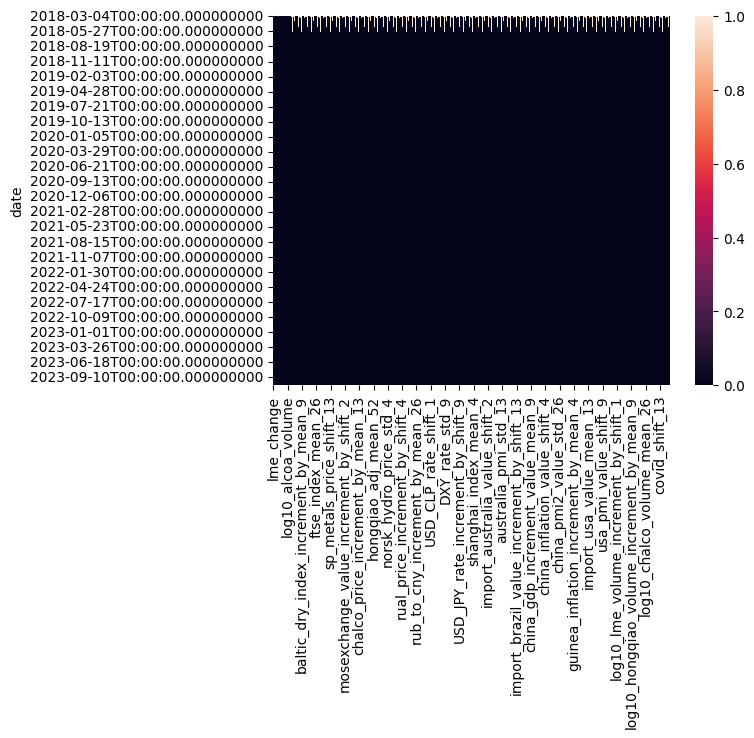

In [28]:
sns.heatmap(dataset_per_week.isna())

In [29]:
# Отрежем вверх
dataset_per_week = dataset_per_week.iloc[13:]

In [30]:
# Отбросим плохие колонки
cols = dataset_per_week.isna().sum()[dataset_per_week.isna().sum()>0].index.values.copy()
dataset_per_week = dataset_per_week.drop(columns=cols)

In [31]:
dataset_per_week.shape

(282, 1441)

In [32]:
dataset_per_week.columns

Index(['lme_change', 'baltic_dry_index', 'bloomberg_metals_price',
       'bloomberg_metals_change', 'ftse_index', 'ftse_index_change',
       'sp_metals_price', 'sp_metals_change', 'mosexchange_value',
       'alcoa_price',
       ...
       'after_feb_std_26', 'after_feb_increment_by_shift_1',
       'after_feb_increment_by_shift_2', 'after_feb_increment_by_shift_4',
       'after_feb_increment_by_shift_9', 'after_feb_increment_by_shift_13',
       'after_feb_increment_by_mean_4', 'after_feb_increment_by_mean_9',
       'after_feb_increment_by_mean_13', 'after_feb_increment_by_mean_26'],
      dtype='object', length=1441)

In [33]:
candidates = dataset_per_week.corr(method='spearman').lme_price_smooth.sort_values()[-600:]

In [34]:
candidates = candidates.sort_values(ascending=False).index.values

In [35]:
candidates

array(['lme_price_smooth', 'bloomberg_metals_price_mean_4',
       'bloomberg_metals_price_shift_1', 'bloomberg_metals_price',
       'bloomberg_metals_price_mean_9', 'bloomberg_metals_price_mean_13',
       'bloomberg_metals_price_shift_2', 'log10_chalco_volume_mean_52',
       'ftse_index_mean_13', 'bloomberg_metals_price_shift_4',
       'ftse_index_mean_9', 'ftse_index_mean_26', 'ftse_index_mean_4',
       'ftse_index_shift_1', 'ftse_index', 'ftse_index_shift_2',
       'bloomberg_metals_price_shift_9', 'hongqiao_adj_mean_26',
       'ftse_index_shift_4', 'hongqiao_adj_mean_13',
       'bloomberg_metals_price_mean_26', 'alcoa_price',
       'log10_chalco_volume_mean_26', 'hongqiao_adj_mean_9',
       'norsk_hydro_price', 'hongqiao_price_mean_13',
       'alcoa_price_shift_1', 'norsk_hydro_price_shift_1',
       'hongqiao_price_mean_9', 'ftse_index_shift_9',
       'hongqiao_adj_mean_52', 'hongqiao_price_mean_26',
       'norsk_hydro_price_mean_4', 'alcoa_price_mean_4',
       'hong

In [36]:
correlation_matrix = dataset_per_week[candidates].corr(method='spearman')

In [37]:
correlation_matrix

lme_price_smooth  \
lme_price_smooth                                 1.000000   
bloomberg_metals_price_mean_4                    0.964098   
bloomberg_metals_price_shift_1                   0.963057   
bloomberg_metals_price                           0.962396   
bloomberg_metals_price_mean_9                    0.959702   
...                                                   ...   
log10_alcoa_volume_std_13                        0.256770   
log10_alcoa_volume_std_9                         0.255119   
norsk_hydro_adj_increment_by_mean_9              0.254794   
export_china_value_increment_by_mean_26          0.254735   
rual_price_change_std_9                          0.254562   

                                         bloomberg_metals_price_mean_4  \
lme_price_smooth                                              0.964098   
bloomberg_metals_price_mean_4                                 1.000000   
bloomberg_metals_price_shift_1                                0.994951   
bloomberg_metals_price                                        0.987447   
bloomberg_metals_price_mean_9                                 0.984600   
...                                                                ...   
log10_alcoa_volume_std_13                                     0.223411   
log10_alcoa_volume_std_9                                      0.235166   
norsk_hydro_adj_increment_by_mean_9                           0.250845   
export_china_value_increment_by_mean_26                       0.216271   
rual_price_change_std_9                                       0.201636   

                                         bloomberg_metals_price_shift_1  \
lme_price_smooth                                               0.963057   
bloomberg_metals_price_mean_4                                  0.994951   
bloomberg_metals_price_shift_1                                 1.000000   
bloomberg_metals_price                                         0.988577   
bloomberg_metals_price_mean_9                                  0.974252   
...                                                                 ...   
log10_alcoa_volume_std_13                                      0.224791   
log10_alcoa_volume_std_9                                       0.237207   
norsk_hydro_adj_increment_by_mean_9                            0.272513   
export_china_value_increment_by_mean_26                        0.213047   
rual_price_change_std_9                                        0.204574   

                                         bloomberg_metals_price  \
lme_price_smooth                                       0.962396   
bloomberg_metals_price_mean_4                          0.987447   
bloomberg_metals_price_shift_1                         0.988577   
bloomberg_metals_price                                 1.000000   
bloomberg_metals_price_mean_9                          0.963240   
...                                                         ...   
log10_alcoa_volume_std_13                              0.221409   
log10_alcoa_volume_std_9                               0.231924   
norsk_hydro_adj_increment_by_mean_9                    0.312899   
export_china_value_increment_by_mean_26                0.211898   
rual_price_change_std_9                                0.206500   

                                         bloomberg_metals_price_mean_9  \
lme_price_smooth                                              0.959702   
bloomberg_metals_price_mean_4                                 0.984600   
bloomberg_metals_price_shift_1                                0.974252   
bloomberg_metals_price                                        0.963240   
bloomberg_metals_price_mean_9                                 1.000000   
...                                                                ...   
log10_alcoa_volume_std_13                                     0.222559   
log10_alcoa_volume_std_9                                      0.240239   
norsk_hydro_adj_increment_by_mean_9            

In [38]:
candidates = candidates[1:]

In [39]:
def select(candidates, corr_matrix):
    features = list(candidates.copy())
    l = len(candidates)
    for i in range(l):
        for j in range(i+1,l):
            if corr_matrix[candidates[i]][candidates[j]]>0.75:
                if corr_matrix['lme_price_smooth'][candidates[i]] > corr_matrix['lme_price_smooth'][candidates[j]]:
                    try:
                        features.remove(candidates[j])
                    except:
                        pass
                else:
                    try:
                        features.remove(candidates[i])
                    except:
                        pass
    return features

In [40]:
features = select(candidates=candidates, corr_matrix=correlation_matrix)
len(features)

59

In [41]:
features

['bloomberg_metals_price_mean_4',
 'chalco_adj_std_13',
 'usa_inflation_value_shift_13',
 'usd_to_hkd_increment_by_mean_26',
 'rual_price_std_26',
 'ftse_index_std_13',
 'hongqiao_adj_std_4',
 'alcoa_price_std_4',
 'norsk_hydro_adj_std_4',
 'bloomberg_metals_price_std_9',
 'chalco_price_std_4',
 'eu_inflation_value_increment_by_mean_26',
 'ftse_index_std_4',
 'USD_JPY_rate_increment_by_mean_26',
 'ftse_index_change_mean_52',
 'eu_inflation_value_std_13',
 'rual_price_std_13',
 'baltic_dry_index_std_9',
 'export_australia_value_std_26',
 'australia_pmi_std_26',
 'sp_metals_price_std_4',
 'bloomberg_metals_price_std_4',
 'USD_EUR_rate_std_26',
 'import_usa_value_std_13',
 'export_usa_value_std_9',
 'guinea_inflation_std_26',
 'sp_metals_price_std_9',
 'usa_gdp_increment_value',
 'norsk_hydro_adj_increment_by_mean_26',
 'rual_price_std_4',
 'australia_inflation_increment_by_mean_26',
 'australia_inflation_std_26',
 'australia_pmi_std_13',
 'bloomberg_metals_change_std_4',
 'export_usa_val

In [42]:
dataset_per_week['target_1'] = dataset_per_week.lme_price_smooth.diff(periods=1)
dataset_per_week['target_2'] = dataset_per_week.lme_price_smooth.diff(periods=2)
dataset_per_week['target_3'] = dataset_per_week.lme_price_smooth.diff(periods=3)
dataset_per_week['target_4'] = dataset_per_week.lme_price_smooth.diff(periods=4)
features.extend(["covid", "after_feb", "lme_price_smooth", "target_1", "target_2", "target_3", "target_4"])
final_df = dataset_per_week[features]

In [43]:
final_df

bloomberg_metals_price_mean_4  chalco_adj_std_13  \
date                                                           
2018-06-03                     136.120179           0.225700   
2018-06-10                     137.564821           0.227441   
2018-06-17                     138.300536           0.246888   
2018-06-24                     137.646875           0.318309   
2018-07-01                     135.948214           0.398990   
...                                   ...                ...   
2023-09-24                     142.691429           0.409200   
2023-10-01                     142.300714           0.415306   
2023-10-08                     141.477857           0.408404   
2023-10-15                     140.052143           0.392652   
2023-10-22                     138.657500           0.363872   

            usa_inflation_value_shift_13  usd_to_hkd_increment_by_mean_26  \
date                                                                        
2018-06-03                           0.2                         0.000788   
2018-06-10                           0.4                         0.001307   
2018-06-17                           0.4                         0.002545   
2018-06-24                           0.4                         0.001900   
2018-07-01                           0.4                         0.002152   
...                                  ...                              ...   
2023-09-24                           0.4                        -0.011176   
2023-10-01                           0.4                        -0.007527   
2023-10-08                           0.1                         0.000182   
2023-10-15                           0.1                        -0.005794   
2023-10-22                           0.1                        -0.005357   

            rual_price_std_26  ftse_index_std_13  hongqiao_adj_std_4  \
date                                                                   
2018-06-03           5.279096         499.688303            0.064213   
2018-06-10           5.127011         506.845298            0.061950   
2018-06-17           5.055682         505.386993            0.067456   
2018-06-24           5.076571         533.758244            0.237979   
2018-07-01           5.084261         569.287511            0.332562   
...                       ...                ...                 ...   
2023-09-24           1.374927         123.407431            0.073179   
2023-10-01           1.378552         134.210113            0.204488   
2023-10-08           1.391796         144.878025            0.265490   
2023-10-15           1.398687         153.885007            0.416869   
2023-10-22           1.346038         181.162344            0.470855   

            alcoa_price_std_4  norsk_hydro_adj_std_4  \
date                                                   
2018-06-03           2.505895               1.031003   
2018-06-10           1.248856               1.118092   
2018-06-17           0.595548               1.235748   
2018-06-24           1.730484               0.883078   
2018-07-01           1.878480               1.657978   
...                       ...                    ...   
2023-09-24           0.623283               1.069530   
2023-10-01           0.789050               1.933803   
2023-10-08           0.796385               1.520419   
2023-10-15           0.528670               1.564938   
2023-10-22           1.125830               2.379864   

            bloomberg_metals_price_std_9  chalco_price_std_4  \
date                                                           
2018-06-03                      2.600087            0.135393   
2018-06-10                      2.390589            0.108999   
2018-06-17                      2.394314            0.087519   
2018-06-24                      2.447601            0.211213   
2018-07-01                      3.173083            0.347230   
...                                  ...                 ...   

In [178]:
# После генерации признаков с помощью агрегаций появились некоторые признаки, которые могут иметь связь с изучаемым таргетом

In [44]:
final_df.to_csv('../data/processed/prepared_dataset.csv')

In [45]:
df = pd.read_csv('../data/processed/prepared_dataset.csv', parse_dates=True, index_col=0)
df.shape

(282, 66)